<a href="https://colab.research.google.com/github/mujtaba-ssj/PySpark/blob/main/assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [ ]:
ds = pd.read_excel('marketing_campaign.xlsx')

In [ ]:
ds.shape

(2240, 31)

In [ ]:
ds.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
#checking if data has any null values
ds.isnull().sum()
ds.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Year_Customer          0
Month_Customer         0
Day_Customer           0
dtype: int64

In [ ]:
#replacing na with mean
ds['Income'].fillna((ds['Income'].mean()), inplace=True)

In [ ]:
response_rate = (ds.groupby('Response').size()/ds['Response'].count())*100
print(response_rate)

Response
0    85.089286
1    14.910714
dtype: float64


<AxesSubplot:xlabel='Education', ylabel='count'>

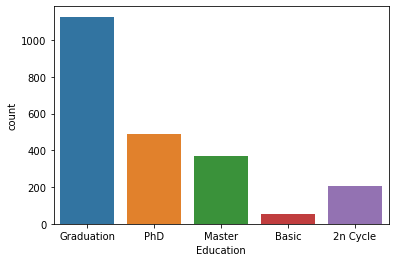

In [ ]:
sns.countplot(x = 'Education',data = ds)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

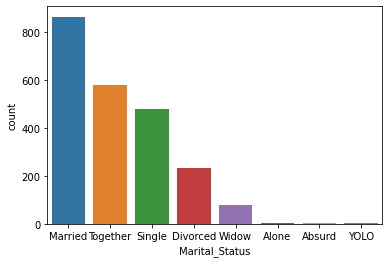

In [ ]:
sns.countplot(x = 'Marital_Status',data = ds, order = ds['Marital_Status'].value_counts().index)

In [ ]:
LabEn=LabelEncoder()#encode the education column
lab=LabEn.fit_transform(ds['Education'])
lab
ds.drop('Education',axis=1)
ds['Education']=lab

In [ ]:
label1=LabEn.fit_transform(ds['Marital_Status'])#encode the marital_Status column
ds.drop('Marital_Status',axis=1)
ds['Marital_Status']=label1
ds

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,4,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,4,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,5,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,4,5,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,2,2,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,3,5,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
ds['Dt_Customer'] = pd.to_datetime(ds['Dt_Customer'])#convert the date column to date type column, and divide into three columns
ds['Year_Customer'] = ds['Dt_Customer'].apply(lambda x: x.year)
ds['Month_Customer'] = ds['Dt_Customer'].apply(lambda x: x.month)
ds['Day_Customer'] = ds['Dt_Customer'].apply(lambda x: x.day)
ds = ds.drop('Dt_Customer', axis=1)

In [ ]:
for col in ds.columns :
    if len(ds[col].value_counts()) == 1 :
        print(ds[col].value_counts())

3    2240
Name: Z_CostContact, dtype: int64
11    2240
Name: Z_Revenue, dtype: int64


In [ ]:
y=ds['Response']#specify the dependent variable and independent variable
x=ds.drop(['ID','Response','Z_CostContact','Z_Revenue'],axis=1)
x

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Year_Customer,Month_Customer,Day_Customer
0,1957,2,4,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,2012,9,4
1,1954,2,4,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,2014,3,8
2,1965,2,5,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,2013,8,21
3,1984,2,5,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,2014,2,10
4,1981,4,3,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,2014,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,3,61223.0,0,1,46,709,43,182,...,5,0,0,0,0,0,0,2013,6,13
2236,1946,4,5,64014.0,2,1,56,406,0,30,...,7,0,0,0,1,0,0,2014,6,10
2237,1981,2,2,56981.0,0,0,91,908,48,217,...,6,0,1,0,0,0,0,2014,1,25
2238,1956,3,5,69245.0,0,1,8,428,30,214,...,3,0,0,0,0,0,0,2014,1,24


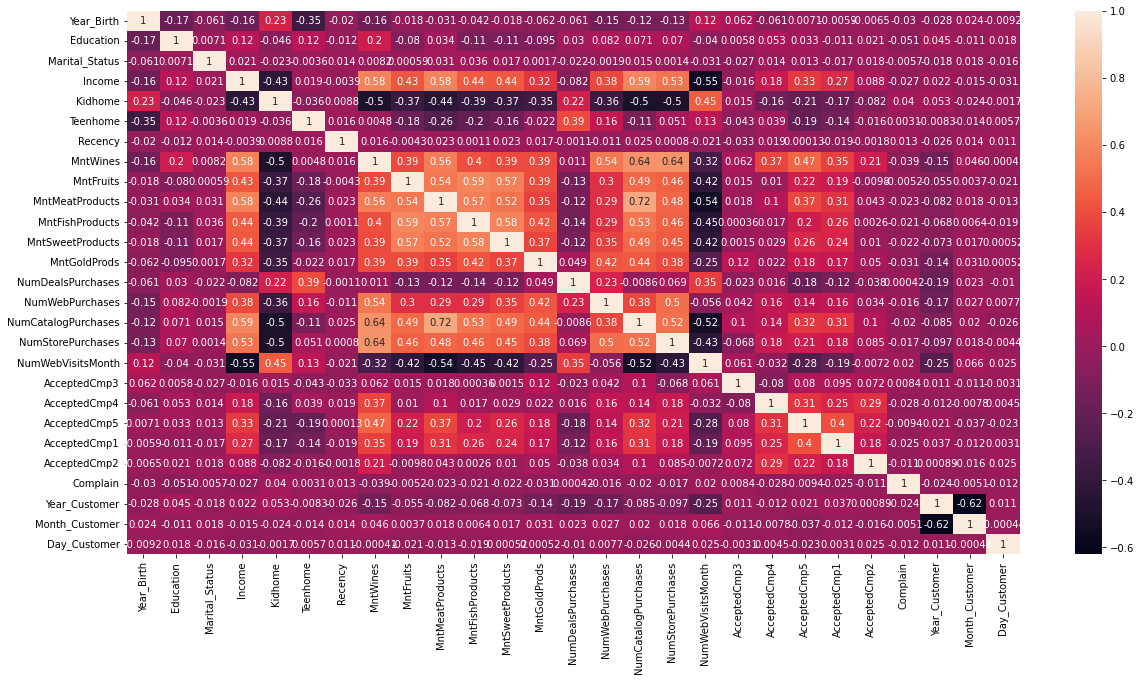

In [ ]:
corrMatrix=x.corr()#check correlation
plt.figure(figsize=(20,10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
ds.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,4,58138.0,0,0,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,4,46344.0,1,1,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,5,71613.0,0,0,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,5,26646.0,1,0,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4,3,58293.0,1,0,94,173,43,...,5,0,0,0,0,0,0,3,11,0


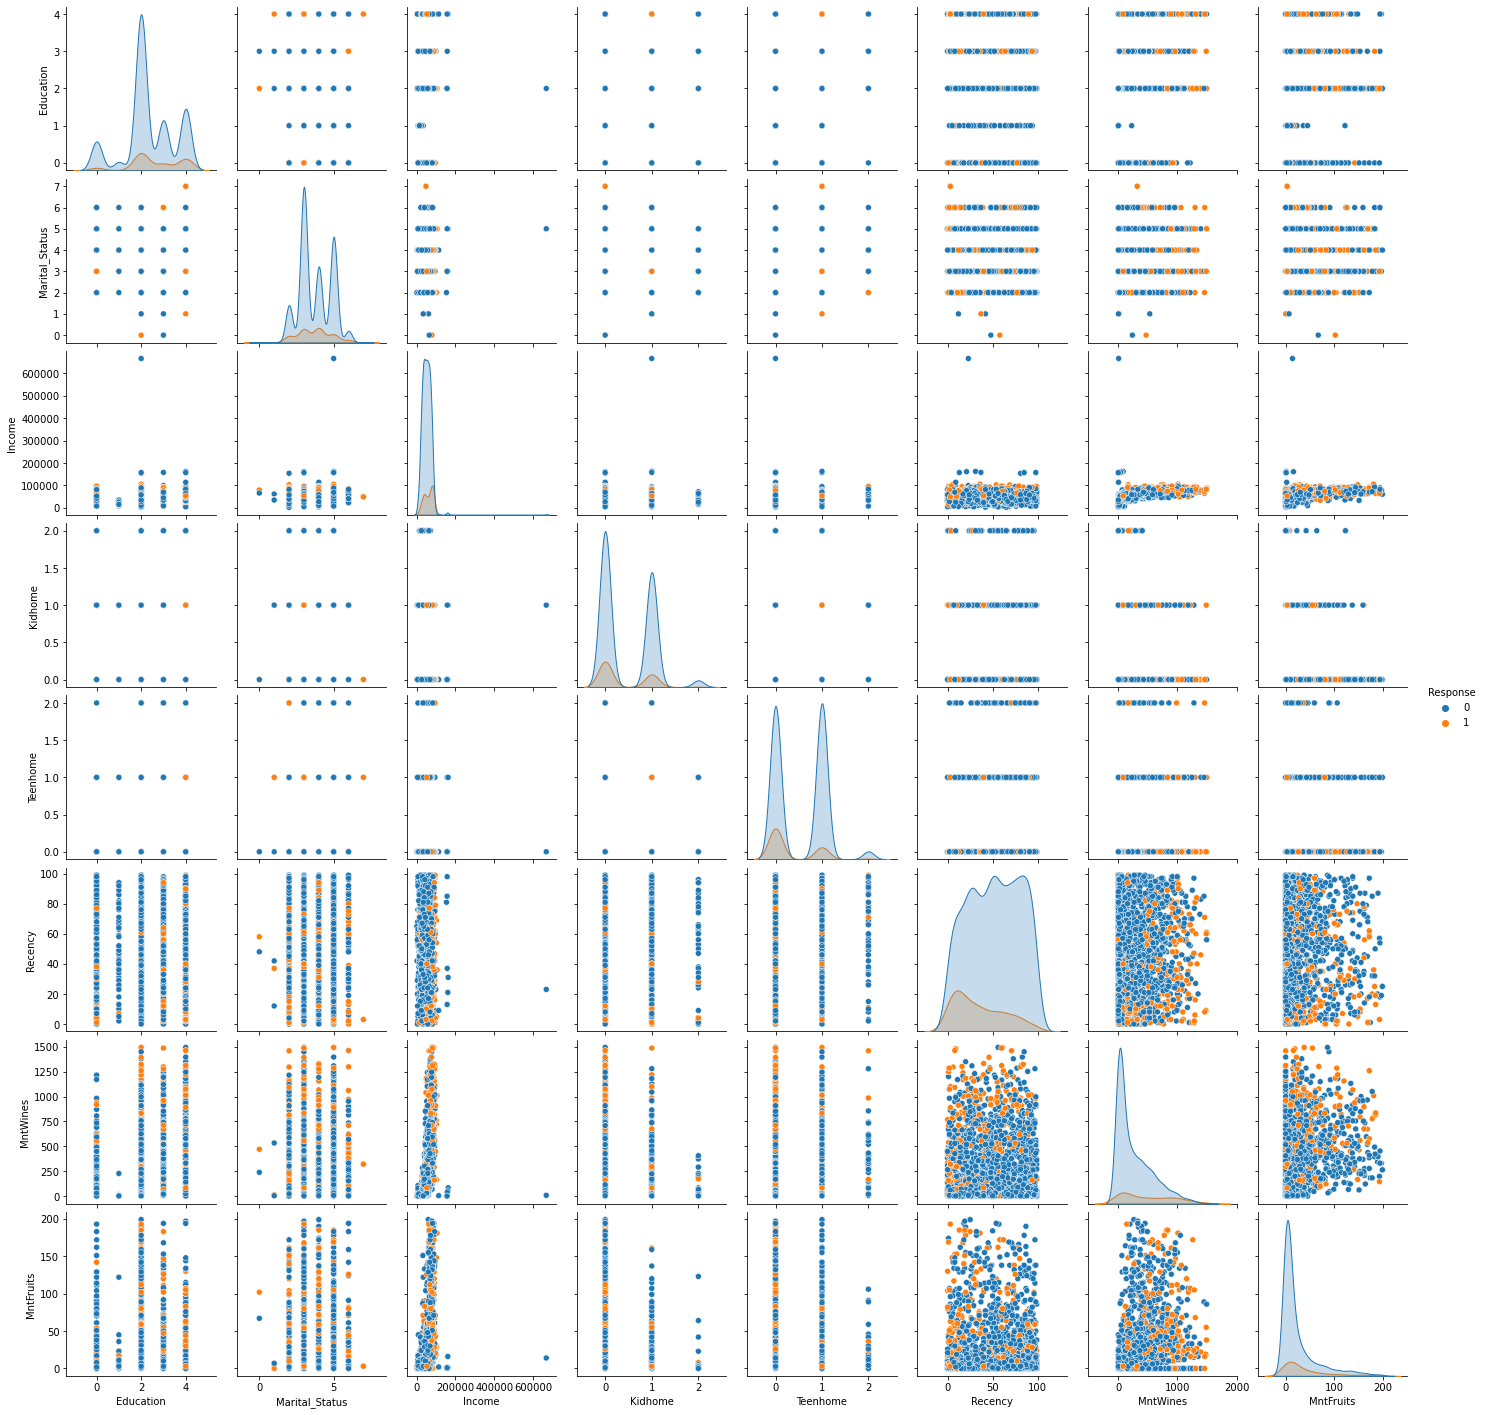

In [ ]:
#pairplot for education and recency
ds1 = ds.iloc[:,[2,3,4,5,6,7,8,9,27]]
sns.pairplot(ds1,hue='Response')
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.25,random_state=42)
x_train

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Year_Customer,Month_Customer,Day_Customer
1315,1962,4,4,27238.0,1,1,39,37,0,17,...,9,0,0,0,0,0,0,2013,4,20
2220,1979,2,3,58025.0,0,1,81,270,31,88,...,4,0,0,0,0,0,0,2013,11,26
889,1978,3,4,68092.0,0,0,7,852,60,207,...,5,0,0,0,0,0,0,2013,12,16
780,1974,4,4,71466.0,0,0,86,412,12,546,...,1,0,0,0,0,0,0,2014,4,5
2021,1982,3,3,43815.0,1,0,53,14,10,29,...,6,0,0,0,0,0,0,2013,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1969,2,3,44078.0,1,1,17,24,1,10,...,5,0,0,0,0,0,0,2014,6,19
1095,1979,2,4,61825.0,0,1,56,162,50,100,...,4,0,0,0,0,0,0,2013,8,7
1130,1951,3,3,67381.0,0,1,67,815,8,53,...,7,0,1,0,0,0,0,2013,1,15
1294,1963,4,4,48918.0,1,1,21,52,0,9,...,4,0,0,0,0,0,0,2014,4,12


In [ ]:
sc = StandardScaler()
x1_train = sc.fit_transform(x_train)
x1_test = sc.transform(x_test)
x1_train.mean(axis=0)

array([ 9.10647219e-15,  5.70971841e-17, -4.22942105e-17,  9.62193288e-17,
        1.23181888e-16, -1.79750394e-17,  7.40148683e-17,  1.90323947e-17,
       -5.49824736e-17,  3.17206578e-17,  2.11471052e-18, -1.74463618e-17,
       -4.44089210e-17,  6.76707367e-17,  5.39251183e-17,  2.96059473e-17,
       -2.61695427e-17, -1.81865105e-16,  0.00000000e+00,  9.51619735e-18,
        9.93913946e-17,  7.61295788e-17, -1.69176842e-17,  5.28677631e-18,
        4.44575593e-14, -9.83340393e-17, -2.74912368e-17])

In [ ]:
classifier=svm.SVC(kernel='linear')
classifier_final=classifier.fit(x1_train,y_train)
print(classifier_final.score(x1_train,y_train))

0.8541666666666666


Text(0.5, 0, 'Permutation Importance')

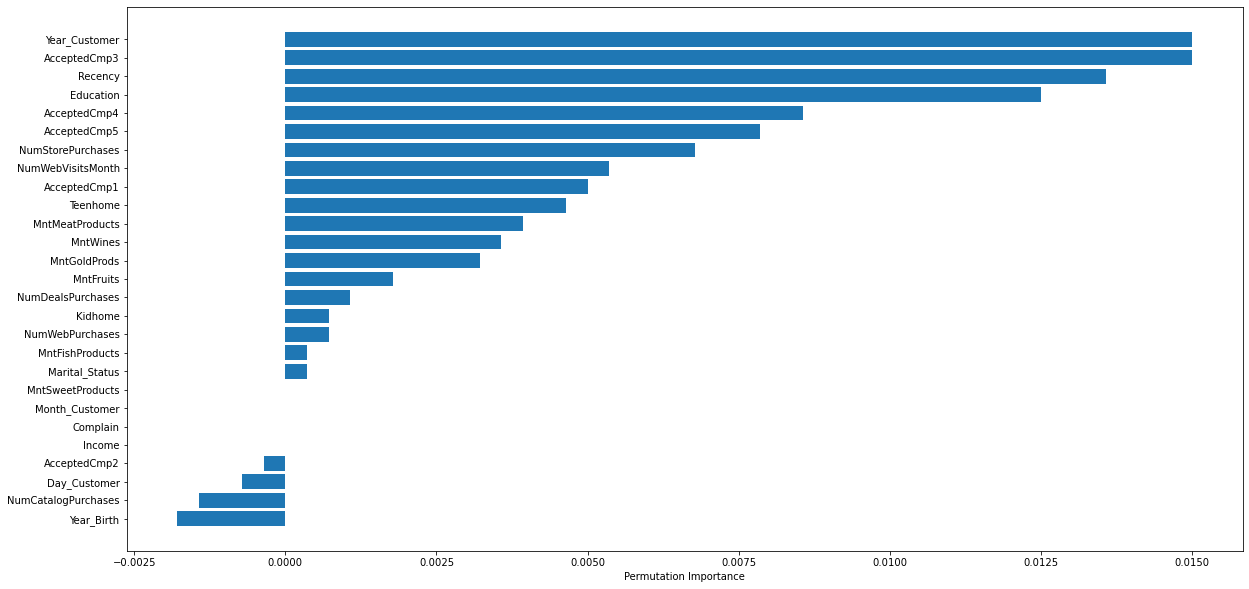

In [ ]:
perm_importance = permutation_importance(classifier_final, x1_test, y_test)

feature_names = ["Year_Birth","Education","Marital_Status", "Income","Kidhome","Teenhome","Recency","MntWines","MntFruits",
"MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases",
"NumStorePurchases","NumWebVisitsMonth","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Complain", "Year_Customer", "Month_Customer", "Day_Customer"]
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(20,10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [ ]:
y_pred1=classifier.predict(x1_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       474
           1       0.70      0.30      0.42        86

    accuracy                           0.87       560
   macro avg       0.79      0.64      0.68       560
weighted avg       0.86      0.87      0.85       560



In [ ]:
precision_recall_fscore_support(y_test, y_pred1, average='macro')

(0.7939899746783112, 0.6395594151702482, 0.6757752933597541, None)

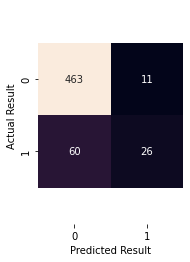

In [ ]:
%matplotlib inline
mat = confusion_matrix(y_test, y_pred1)
sns.heatmap(mat, fmt='g', square=True, annot=True, cbar=False)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show()

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred1)
confusion_matrix

array([[463,  11],
       [ 60,  26]], dtype=int64)

In [ ]:
#trying to penalize 
svm_classifier1 = svm.SVC(class_weight='balanced', probability=True)
svm_classifier1.fit(x1_train, y_train)
pred_Y = svm_classifier1.predict(x1_test)
print(svm_classifier1.score(x1_train,y_train))

0.9130952380952381


In [ ]:
%matplotlib inline
mat = confusion_matrix(y_test, pred_Y)
sns.heatmap(mat, fmt='g', square=True, annot=True, cbar=False)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show()

In [ ]:
print(classification_report(y_test,pred_Y))

In [ ]:
precision_recall_fscore_support(y_test, pred_Y, average='macro')

In [ ]:
#model 3
y1=ds['Response']#specify the dependent variable and independent variable
x1=ds.drop(['ID','Response','Z_CostContact','Z_Revenue','AcceptedCmp2','Day_Customer','NumCatalogPurchases','Year_Birth'],axis=1)
x1

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain,Year_Customer,Month_Customer
0,2,4,58138.0,0,0,58,635,88,546,172,...,8,4,7,0,0,0,0,0,2012,9
1,2,4,46344.0,1,1,38,11,1,6,2,...,1,2,5,0,0,0,0,0,2014,3
2,2,5,71613.0,0,0,26,426,49,127,111,...,8,10,4,0,0,0,0,0,2013,8
3,2,5,26646.0,1,0,26,11,4,20,10,...,2,4,6,0,0,0,0,0,2014,2
4,4,3,58293.0,1,0,94,173,43,118,46,...,5,6,5,0,0,0,0,0,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,61223.0,0,1,46,709,43,182,42,...,9,4,5,0,0,0,0,0,2013,6
2236,4,5,64014.0,2,1,56,406,0,30,0,...,8,5,7,0,0,0,1,0,2014,6
2237,2,2,56981.0,0,0,91,908,48,217,32,...,2,13,6,0,1,0,0,0,2014,1
2238,3,5,69245.0,0,1,8,428,30,214,80,...,6,10,3,0,0,0,0,0,2014,1


In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(
    x1, y1, 
    test_size=0.25,random_state=42)
x1_train

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain,Year_Customer,Month_Customer
1315,4,4,27238.0,1,1,39,37,0,17,0,...,3,3,9,0,0,0,0,0,2013,4
2220,2,3,58025.0,0,1,81,270,31,88,11,...,3,10,4,0,0,0,0,0,2013,11
889,3,4,68092.0,0,0,7,852,60,207,78,...,2,10,5,0,0,0,0,0,2013,12
780,4,4,71466.0,0,0,86,412,12,546,78,...,4,10,1,0,0,0,0,0,2014,4
2021,3,3,43815.0,1,0,53,14,10,29,4,...,2,3,6,0,0,0,0,0,2013,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,2,3,44078.0,1,1,17,24,1,10,2,...,2,3,5,0,0,0,0,0,2014,6
1095,2,4,61825.0,0,1,56,162,50,100,55,...,4,8,4,0,0,0,0,0,2013,8
1130,3,3,67381.0,0,1,67,815,8,53,11,...,2,9,7,0,1,0,0,0,2013,1
1294,4,4,48918.0,1,1,21,52,0,9,0,...,1,4,4,0,0,0,0,0,2014,4


In [ ]:
sc = StandardScaler()
x11_train = sc.fit_transform(x1_train)
x11_test = sc.transform(x1_test)
x11_train.mean(axis=0)

array([ 5.70971841e-17, -4.22942105e-17,  9.62193288e-17,  1.23181888e-16,
       -1.79750394e-17,  7.40148683e-17,  1.90323947e-17, -5.49824736e-17,
        3.17206578e-17,  2.11471052e-18, -1.74463618e-17, -4.44089210e-17,
        6.76707367e-17,  5.39251183e-17, -2.61695427e-17, -1.81865105e-16,
        0.00000000e+00,  9.51619735e-18,  9.93913946e-17,  7.61295788e-17,
        5.28677631e-18,  4.44575593e-14, -9.83340393e-17])

In [ ]:
classifier11=svm.SVC(kernel='linear')
classifier_final11=classifier11.fit(x11_train,y1_train)
print(classifier_final11.score(x11_train,y1_train))

0.8952380952380953


Text(0.5, 0, 'Permutation Importance')

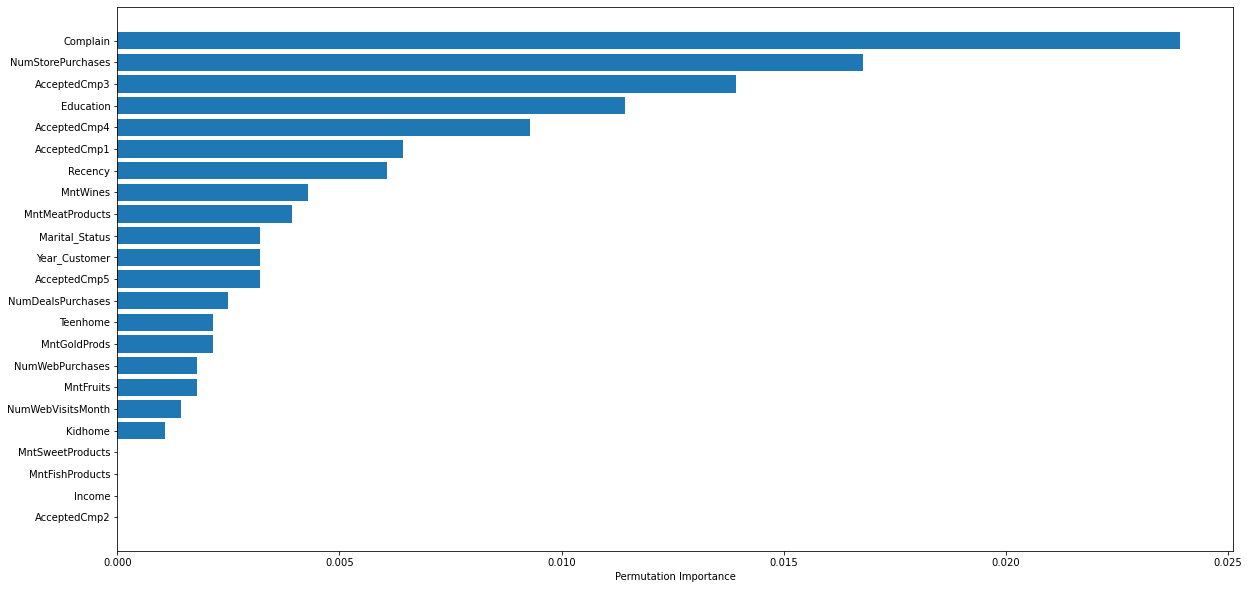

In [ ]:
perm_importance = permutation_importance(classifier_final11, x11_test, y1_test)

feature_names = ["Education","Marital_Status", "Income","Kidhome","Teenhome","Recency","MntWines","MntFruits",
"MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","NumDealsPurchases","NumWebPurchases","NumStorePurchases","NumWebVisitsMonth","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Complain", "Year_Customer", "Month_Customer"]
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(20,10))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [ ]:
pred_Y1 = classifier_final11.predict(x11_test)
precision_recall_fscore_support(y1_test, pred_Y1, average='macro')

(0.803312170874551, 0.6511873221469924, 0.6893266331658291, None)